## Atividade 02 - A

a) Considerando o conjunto de dados Wine Dataset da UCI,
1. Explore visualmente e numericamente os dados.
2. Prepare os dados utilizando as técnicas ensinadas na disciplina, quando pertinente.
3. Para cada técnica de preparação de dados aplicada, avalie os algorimos K-NN,
LogisticRegression, SVM, Árvore de descisão, RandomForest e um outro que deverá ser
escolhido pelo aluno.
4. Utilize gráficos e tabelas para apresentar as métricas obtidas (em treino e em teste), e
escolha o melhor modelo com base em uma das métricas apresentadas. Justifique a escolha
da métrica com base no sistema em questão.


### Identificação do problema

Á partir da entrada das características de um determinado vinho pelo usuário, o programa deve determinar com qual dos 3 tipos de vinhos, nos quais temos 13 informações de parâmetros, ele se iguala.

#### Setup do Projeto

In [ ]:
# Importação das bibliotecas e identificação do endereço de download do dataset

# Para Git:
import joblib
import os
import urllib

# Bibliotecas:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,  classification_report

from sklearn.preprocessing import MinMaxScaler

#-------------------------------------------------------------------------------
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#-------------------------------------------------------------------------------

print(f'Matplot version: {matplotlib.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')
print(f'Seaborn version: {sns.__version__}')

WINE_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/'
WINE_URL = WINE_ROOT + 'wine.data' 

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'wine.csv'
WINE_DATA = os.path.join(DATA_PATH, DATA_FILE)

RANDOM_STATE = 42

print('\nConfiguração completa !')

Matplot version: 3.2.2
Numpy version: 1.19.5
Pandas version: 1.1.5
Scikit-learn version: 0.22.2.post1
Seaborn version: 0.11.2

Configuração completa !


#### Download e Carregamento dos Dados

In [ ]:
# Download do dataset e carregamento do mesmo para um DataFrame.
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)
    
download_data(WINE_URL, DATA_PATH, DATA_FILE)

col_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 
             'flavanoids', 'nonflav_phenols', 'proanthocyanins', 'color', 'hue', 'od280_od350', 'proline']

def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, header=None, names=col_names)

wine_df = load_data(DATA_PATH, DATA_FILE)

#### Análise Exploratória dos Dados

In [ ]:
wine_df

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color,hue,od280_od350,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
wine_df.describe()

## Os dados das features possuem valores com amplitudes muito distantes entre si. Dessa forma, os mesmos deverão ser normalizados.

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color,hue,od280_od350,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              178 non-null    int64  
 1   alcohol            178 non-null    float64
 2   malic_acid         178 non-null    float64
 3   ash                178 non-null    float64
 4   alcalinity_of_ash  178 non-null    float64
 5   magnesium          178 non-null    int64  
 6   total_phenols      178 non-null    float64
 7   flavanoids         178 non-null    float64
 8   nonflav_phenols    178 non-null    float64
 9   proanthocyanins    178 non-null    float64
 10  color              178 non-null    float64
 11  hue                178 non-null    float64
 12  od280_od350        178 non-null    float64
 13  proline            178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
# Verificando dados ausentes:
ausentes = (wine_df[wine_df.columns] == '?').sum()
print(ausentes)

## Sem dados ausentes

class                0
alcohol              0
malic_acid           0
ash                  0
alcalinity_of_ash    0
magnesium            0
total_phenols        0
flavanoids           0
nonflav_phenols      0
proanthocyanins      0
color                0
hue                  0
od280_od350          0
proline              0
dtype: int64


In [ ]:
wine_df['class'].value_counts()

## Classes não equilibradas - Extratificação so dados.

2    71
1    59
3    48
Name: class, dtype: int64

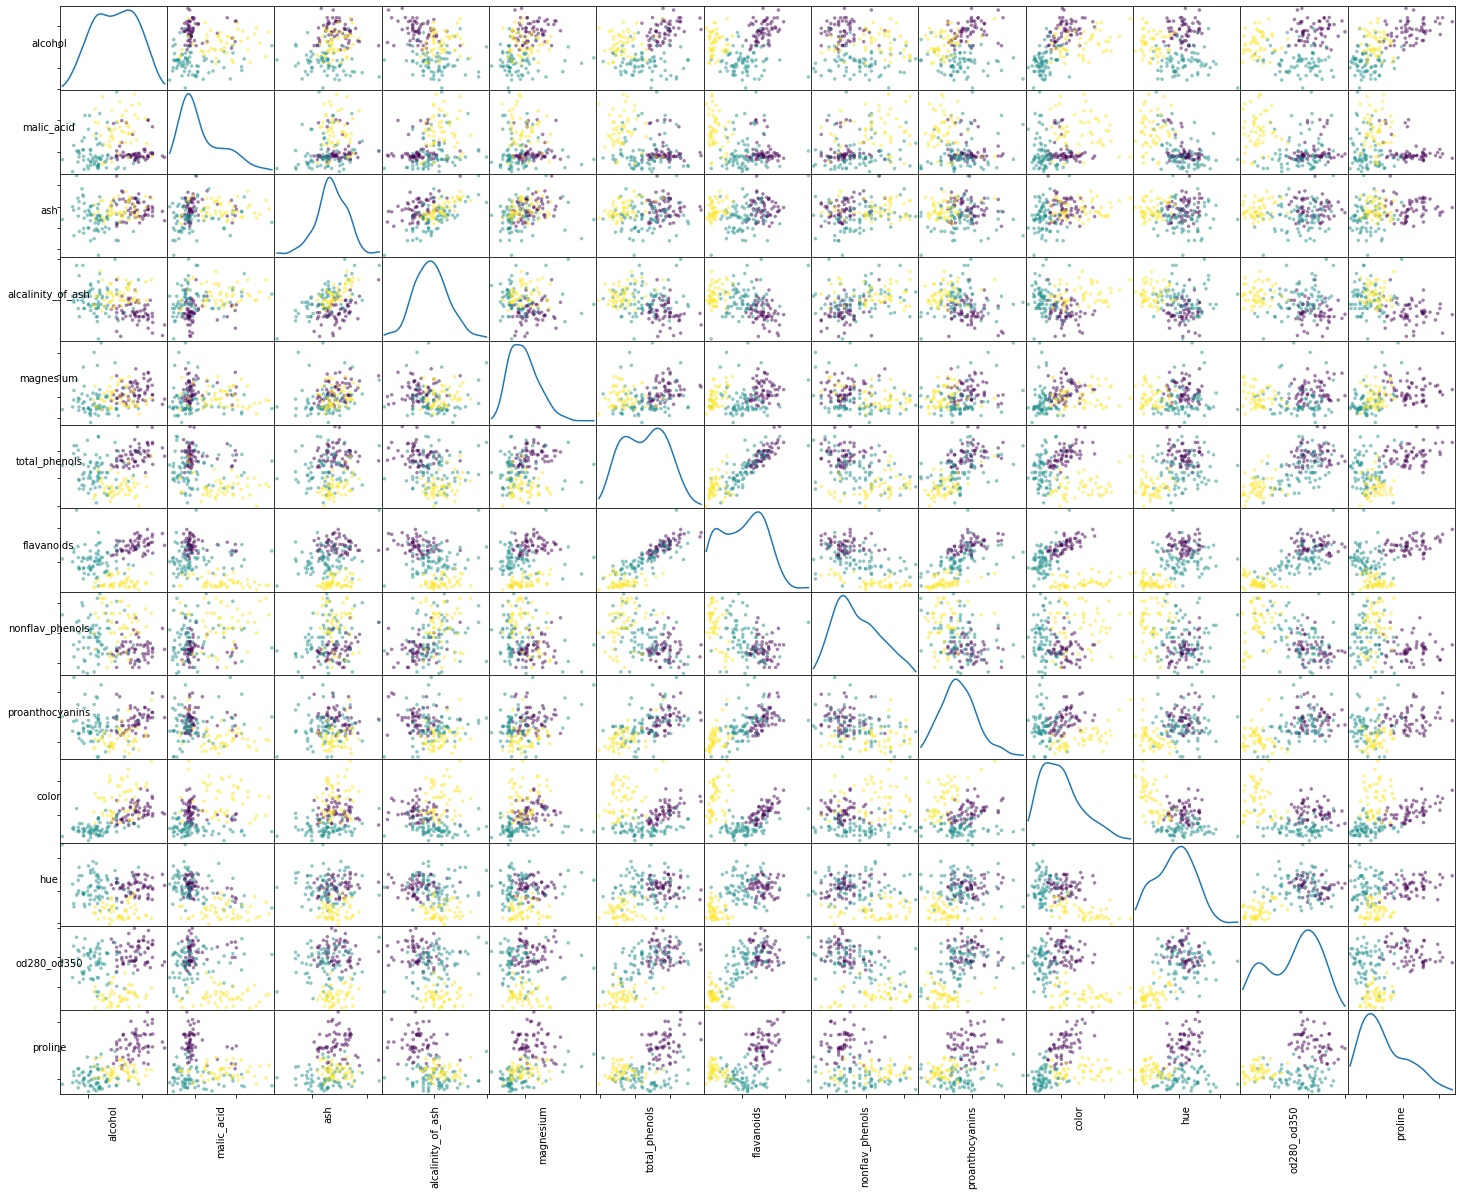

In [ ]:
X = wine_df.drop(['class'], axis=1)
y = wine_df['class']


c = y.astype('category').cat.codes
_ = pd.plotting.scatter_matrix(X, c=c, figsize=[25,20], marker='.', diagonal='kde', s=50)

for ax in _.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [ ]:
# Normalização:

scaler = MinMaxScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color,hue,od280_od350,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


#### Treinamento

In [ ]:
#Separação dos dados para teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, stratify=y, random_state=RANDOM_STATE)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (124, 13)
y_train: (124,)
X_test: (54, 13)
y_test: (54,)


In [ ]:
def build_classifiers():
    """
    Retorna uma lista com os classificadores que serão avaliados.
    """
    classifiers = []
    classifiers.append(
                      ('knn',                              
                        KNeighborsClassifier(),            
                        {'n_neighbors' : range(1, 33, 2)}  
                      )
    )

    classifiers.append(
                      ('lr',                               
                        LogisticRegression(max_iter=1000), 
                        {'penalty' : ['l2'], 'C' : [100, 10, 1, 0.1, 0.01]}  
                      )
    )
    
    classifiers.append(
                      ('svm',
                        SVC(),
                        {'kernel' : ['linear', 'rbf'], 
                         'C' : [2 ** (-5), 1, 2 ** 5, 2 ** 10],
                         'gamma' : [2 ** (-15), 2 ** (-10), 2 ** (-5), 1, 2 ** 5]
                        }
                      )
    )
    
    classifiers.append(
                      ('dt',
                        DecisionTreeClassifier(),
                        {'max_depth' : [2, 4, 6, 8, 10, 12]}
                      )  
    )
    
    classifiers.append(
                      ('rf',
                        RandomForestClassifier(),
                        {'n_estimators' : [10, 50, 100]}
                      ) 
    )
    
    return classifiers

In [ ]:
classifiers = build_classifiers()
results = []
names = []

for name, model, parameters in classifiers:
    print(f'Classificador: {name}')
    gs = GridSearchCV(estimator=model, param_grid=parameters, refit=True, verbose=0)
    gs.fit(X_train, y_train)
    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    cv = cross_val_score(gs, X_train, y_train, cv=kf, scoring='accuracy')
    print(f'Media do resultado do treinamento do CV: {cv.mean():.4f}')
    print(f'Desvio padrao das medicoes dos resultados: {cv.std():.4f}')
    print(f'O melhor resultado foi: {gs.best_params_} com score de {gs.best_score_:.4f}')

    results.append(cv)
    names.append(name)
    
    if name == 'knn':
        y_pred_knn = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'lr':
        y_pred_lr = gs.predict(X_test)       
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'svm':
        y_pred_svm = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'dt':
        y_pred_dt = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'rf':
        y_pred_rf = gs.predict(X_test)        
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    


>> Classificador: knn
Media do resultado do treinamento do CV: 0.9673
Desvio padrao das medicoes dos resultados: 0.0547
O melhor resultado foi: {'n_neighbors': 3} com score de 0.9673
Acuracia do modelo knn: 0.944

>> Classificador: lr
Media do resultado do treinamento do CV: 0.9756
Desvio padrao das medicoes dos resultados: 0.0372
O melhor resultado foi: {'C': 100, 'penalty': 'l2'} com score de 0.9753
Acuracia do modelo lr: 0.981

>> Classificador: svm
Media do resultado do treinamento do CV: 0.9833
Desvio padrao das medicoes dos resultados: 0.0333
O melhor resultado foi: {'C': 32, 'gamma': 1, 'kernel': 'rbf'} com score de 0.9920
Acuracia do modelo svm: 0.963

>> Classificador: dt
Media do resultado do treinamento do CV: 0.8692
Desvio padrao das medicoes dos resultados: 0.0754
O melhor resultado foi: {'max_depth': 6} com score de 0.8780
Acuracia do modelo dt: 0.963

>> Classificador: rf
Media do resultado do treinamento do CV: 0.9756
Desvio padrao das medicoes dos resultados: 0.0372
O

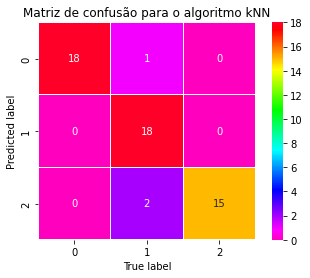

In [ ]:
# matriz de confusão

mtc1 = confusion_matrix(y_test, y_pred_knn)
_1 = sns.heatmap(mtc1.T, square=True, annot=True, fmt='d', linewidths=0.3, cmap='gist_rainbow_r')
_1= plt.title('Matriz de confusão para o algoritmo kNN')
_1= plt.xlabel('True label')
_1= plt.ylabel('Predicted label')


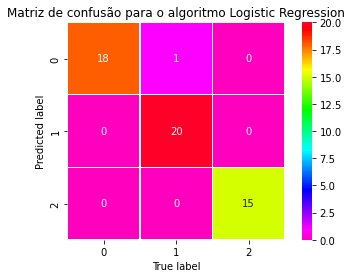

In [ ]:
mtc2 = confusion_matrix(y_test, y_pred_lr)
_2= sns.heatmap(mtc2.T, square=True, annot=True, fmt='d', linewidths=0.3, cmap='gist_rainbow_r')
_2= plt.title('Matriz de confusão para o algoritmo Logistic Regression')
_2= plt.xlabel('True label')
_2= plt.ylabel('Predicted label')



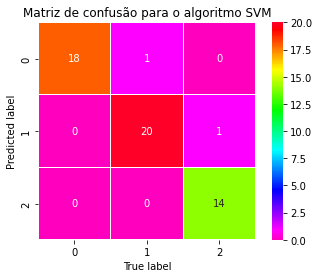

In [ ]:
mtc3 = confusion_matrix(y_test, y_pred_svm)
_3= sns.heatmap(mtc3.T, square=True, annot=True, fmt='d', linewidths=0.3, cmap='gist_rainbow_r')
_3= plt.title('Matriz de confusão para o algoritmo SVM')
_3= plt.xlabel('True label')
_3= plt.ylabel('Predicted label')


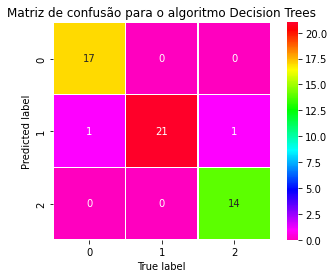

In [ ]:
mtc4 = confusion_matrix(y_test, y_pred_dt)
_4= sns.heatmap(mtc4.T, square=True, annot=True, fmt='d', linewidths=0.3, cmap='gist_rainbow_r')
_4= plt.title('Matriz de confusão para o algoritmo Decision Trees')
_4= plt.xlabel('True label')
_4= plt.ylabel('Predicted label')



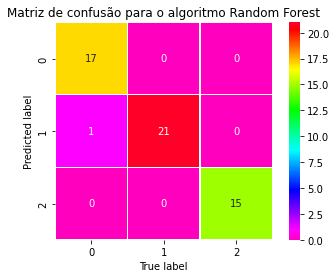

In [ ]:
mtc5 = confusion_matrix(y_test, y_pred_rf)
_5= sns.heatmap(mtc5.T, square=True, annot=True, fmt='d', linewidths=0.3, cmap='gist_rainbow_r')
_5= plt.title('Matriz de confusão para o algoritmo Random Forest')
_5= plt.xlabel('True label')
_5= plt.ylabel('Predicted label')

In [ ]:
# precision, recall e F1-score:

print(f'Knn:\n',classification_report(y_test, y_pred_knn))
print(f'LR:\n',classification_report(y_test, y_pred_lr))
print(f'SVM:\n',classification_report(y_test, y_pred_svm))
print(f'DT\n',classification_report(y_test, y_pred_dt))
print(f'RF\n',classification_report(y_test, y_pred_rf))

Knn:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.86      0.92        21
           3       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

LR:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

SVM:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.95      0.95      0.95        21
           3       1.00      0.93      0.97        15

   

Análise : Observando os dados de precisão e acuracia, é possível observar que o Randow Florest apresentou melhores resultados. Porém ele não demonstra os mesmo resultados sempre.

